In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor

In [2]:
train = pd.read_csv('D:\Machine Learning\Kaggle/Titanic/train.csv')
test = pd.read_csv('D:\Machine Learning\Kaggle/Titanic/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
combined = [train, test]

In [6]:
train.shape

(891, 12)

In [7]:
test.shape

(418, 11)

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the 'describe' function above we can see (row 'mean', column 'Survived') that the mean of the passenger survived is 0.383838.

We can now analyze the survival rate using as a criteria the PClass and the Sex.

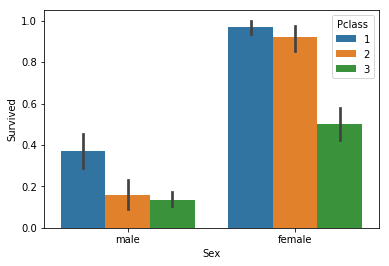

In [9]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train)

What comes out is that the higher the class of the passenger, the more its possibilities to survive.

Also, women survival rate is greater than men' ones.

This aspect is strictly correlated to the maritime tradition of evacuating women and children first.

In fact, if we group the data above for age, what we see is that children have a higher survival rate.

          PassengerId  Survived    Pclass        Age     SibSp     Parch  \
Age                                                                        
(0, 10]    430.843750  0.593750  2.640625   4.268281  1.843750  1.421875   
(10, 20]   447.660870  0.382609  2.530435  17.317391  0.591304  0.391304   
(20, 30]   428.682609  0.365217  2.386957  25.423913  0.321739  0.239130   
(30, 40]   468.690323  0.445161  2.090323  35.051613  0.374194  0.393548   
(40, 50]   483.500000  0.383721  1.918605  45.372093  0.372093  0.430233   
(50, 60]   449.809524  0.404762  1.523810  54.892857  0.309524  0.309524   
(60, 70]   430.882353  0.235294  1.529412  63.882353  0.176471  0.352941   
(70, 80]   438.200000  0.200000  1.800000  73.300000  0.000000  0.000000   

               Fare  
Age                  
(0, 10]   30.434439  
(10, 20]  29.529531  
(20, 30]  28.306719  
(30, 40]  42.496100  
(40, 50]  41.163181  
(50, 60]  44.774802  
(60, 70]  45.910782  
(70, 80]  25.936680  


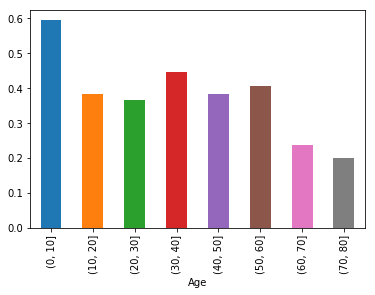

In [10]:
group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
print(age_grouping)
age_grouping['Survived'].plot.bar()

We will now use a swarmplot to see the relations between Age, Class and Sex.

Text(0.5,1,u'Age distribution vs Class')

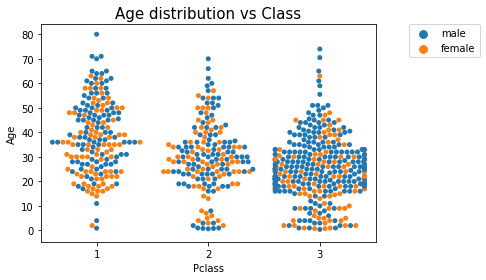

In [11]:
sns.swarmplot(x="Pclass", y="Age", hue="Sex", data=train)
plt.legend(bbox_to_anchor=(1.1, 1), loc=2, borderaxespad=0.)
plt.title("Age distribution vs Class", fontsize=15)

An alternative to the swarmplot could be using a box plot, as shown below.

Thanks to these two plots, we discovered that 1st class passengers seems older: probabily, according to the age, they can afford a expensive ticket.

C:\Users\NIHIT\Anaconda2\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


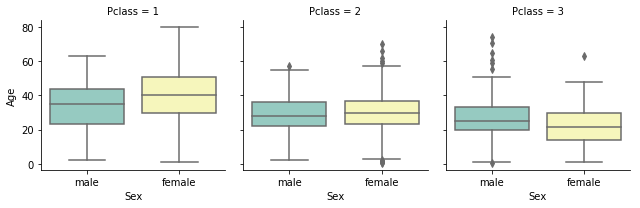

In [12]:
g = sns.FacetGrid(train, col="Pclass")
g.map(sns.boxplot, "Sex", "Age", palette="Set3")

In [13]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [14]:
train = train[np.abs(train["Age"]-train["Age"].mean())<=(3*train["Age"].std())]

In [15]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [16]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [17]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
test['Age'] = test['Age'].fillna(test['Age'].mean())

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
train.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [19]:
test.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [20]:
train['Cabin'].fillna('U', inplace=True)
train['Cabin'] = train['Cabin'].apply(lambda x: x[0])
train['Cabin'].unique()

C:\Users\NIHIT\Anaconda2\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [21]:
test['Cabin'].fillna('U', inplace=True)
test['Cabin'] = test['Cabin'].apply(lambda x: x[0])
test['Cabin'].unique()

array(['U', 'B', 'E', 'A', 'C', 'D', 'F', 'G'], dtype=object)

In [22]:
replacement = {
    'T': 0,
    'U': 1,
    'A': 2,
    'G': 3,
    'C': 4,
    'F': 5,
    'B': 6,
    'E': 7,
    'D': 8
}

train['Cabin'] = train['Cabin'].apply(lambda x: replacement.get(x))


C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [23]:
test['Cabin'] = test['Cabin'].apply(lambda x: replacement.get(x))


We can apply the same logic developed for the Cabin column to the Embarked column The possible values are: C = Cherbourg, Q = Queenstown, S = Southampton We will check first if we find any NaN value (that we will replace with N) and then we will transform this feature in a list of numbers

In [24]:
train['Embarked'].fillna('N', inplace=True)
train['Embarked'] = train['Embarked'].apply(lambda x: x[0])
train['Embarked'].unique()

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


array(['S', 'C', 'Q', 'N'], dtype=object)

In [25]:
replacement = {
    'S': 0,
    'C': 1,
    'Q': 2,
    'N': 3
}

train['Embarked'] = train['Embarked'].apply(lambda x: replacement.get(x))


C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [26]:
test['Embarked'] = test['Embarked'].apply(lambda x: replacement.get(x))


# Adding New Feature

In [27]:
def process_family_train():
    
    # introducing a new feature : the size of families (including the passenger)
    train['FamilySize'] = train['Parch'] + train['SibSp'] + 1
    
    # introducing other features based on the family size
    train['Singleton'] = train['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    train['SmallFamily'] = train['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    train['LargeFamily'] = train['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return train

In [28]:
train = process_family_train()
train.head()

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,1,0,2,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,4,1,2,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,4,0,2,0,1,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,1,0,1,1,0,0


In [29]:
def process_family_test():
    
    # introducing a new feature : the size of families (including the passenger)
    test['FamilySize'] = test['Parch'] + test['SibSp'] + 1
    
    # introducing other features based on the family size
    test['Singleton'] = test['FamilySize'].map(lambda s: 1 if s == 1 else 0)
    test['SmallFamily'] = test['FamilySize'].map(lambda s: 1 if 2 <= s <= 4 else 0)
    test['LargeFamily'] = test['FamilySize'].map(lambda s: 1 if 5 <= s else 0)
    
    return test

In [30]:
test = process_family_test()
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1,2,1,1,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1,0,2,0,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1,2,1,1,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1,0,1,1,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1,0,3,0,1,0


In [31]:
# Grab title from passenger names

train["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)
train.head()

C:\Users\NIHIT\Anaconda2\lib\site-packages\pandas\core\generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,3,Mr,0,22.0,1,0,A/5 21171,7.2500,1,0,2,0,1,0
1,2,1,1,Mrs,1,38.0,1,0,PC 17599,71.2833,4,1,2,0,1,0
2,3,1,3,Miss,1,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,1,0,0
3,4,1,1,Mrs,1,35.0,1,0,113803,53.1000,4,0,2,0,1,0
4,5,0,3,Mr,0,35.0,0,0,373450,8.0500,1,0,1,1,0,0


In [32]:
# Show title counts by sex

train.groupby(["Sex", "Name"]).size().unstack(fill_value=0)

Name,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Sex,,,,,,,,,,,,,,,,,
0,1,2,1,5,1,0,2,36,0,0,0,396,0,0,6,1,0
1,0,0,0,1,0,1,0,0,146,2,1,0,108,1,0,0,1


In [33]:
# Titles with very low cell counts to be combined to "rare" level

rare_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
train.replace(rare_titles, "Rare title", inplace=True)

# Also reassign mlle, ms, and mme accordingly

train.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [34]:
# Show title counts by sex

train.groupby(["Sex", "Name"]).size().unstack(fill_value=0)

Name,Master,Miss,Mr,Mrs,Rare title
Sex,,,,,
0,36,0,396,0,19
1,0,149,0,109,3


In [35]:
#Now we can create a method to map/replace the titles

replacement = {
    'Master': 0,
    'Miss': 1,
    'Mr': 2,
    'Mrs': 3,
    'Rare title': 4
}

train['Name'] = train['Name'].apply(lambda x: replacement.get(x))

C:\Users\NIHIT\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [36]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,1,0,3,2,0,22.0,1,0,A/5 21171,7.2500,1,0,2,0,1,0
1,2,1,1,3,1,38.0,1,0,PC 17599,71.2833,4,1,2,0,1,0
2,3,1,3,1,1,26.0,0,0,STON/O2. 3101282,7.9250,1,0,1,1,0,0
3,4,1,1,3,1,35.0,1,0,113803,53.1000,4,0,2,0,1,0
4,5,0,3,2,0,35.0,0,0,373450,8.0500,1,0,1,1,0,0


In [37]:
test["Name"].replace(to_replace='(.*, )|(\\..*)', value='', inplace=True, regex=True)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,892,3,Mr,0,34.5,0,0,330911,7.8292,1,2,1,1,0,0
1,893,3,Mrs,1,47.0,1,0,363272,7.0000,1,0,2,0,1,0
2,894,2,Mr,0,62.0,0,0,240276,9.6875,1,2,1,1,0,0
3,895,3,Mr,0,27.0,0,0,315154,8.6625,1,0,1,1,0,0
4,896,3,Mrs,1,22.0,1,1,3101298,12.2875,1,0,3,0,1,0


In [38]:
test.groupby(["Sex", "Name"]).size().unstack(fill_value=0)

Name,Col,Dona,Dr,Master,Miss,Mr,Mrs,Ms,Rev
Sex,,,,,,,,,
0,2,0,1,21,0,240,0,0,2
1,0,1,0,0,78,0,72,1,0


In [39]:
rare_titles = ['Dona', 'Lady', 'the Countess','Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer']
test.replace(rare_titles, "Rare title", inplace=True)

test.replace(["Mlle","Ms", "Mme"], ["Miss", "Miss", "Mrs"], inplace=True)

In [40]:
# Show title counts by sex

test.groupby(["Sex", "Name"]).size().unstack(fill_value=0)

Name,Master,Miss,Mr,Mrs,Rare title
Sex,,,,,
0,21,0,240,0,5
1,0,79,0,72,1


In [41]:
#Now we can create a method to map/replace the titles

replacement = {
    'Master': 0,
    'Miss': 1,
    'Mr': 2,
    'Mrs': 3,
    'Rare title': 4
}

test['Name'] = test['Name'].apply(lambda x: replacement.get(x))

In [42]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,892,3,2,0,34.5,0,0,330911,7.8292,1,2,1,1,0,0
1,893,3,3,1,47.0,1,0,363272,7.0000,1,0,2,0,1,0
2,894,2,2,0,62.0,0,0,240276,9.6875,1,2,1,1,0,0
3,895,3,2,0,27.0,0,0,315154,8.6625,1,0,1,1,0,0
4,896,3,3,1,22.0,1,1,3101298,12.2875,1,0,3,0,1,0


In [43]:
train_df = train.drop(['Ticket', 'PassengerId', "Fare"], axis=1)
test_df = test.drop(['Ticket', "Fare"], axis=1)
combined = [train_df, test_df]
train_df.shape, test_df.shape

((712, 13), (418, 13))

In [44]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((712, 12), (712L,), (418, 12))

In [45]:
X_train.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,2,0,22.0,1,0,1,0,2,0,1,0
1,1,3,1,38.0,1,0,4,1,2,0,1,0
2,3,1,1,26.0,0,0,1,0,1,1,0,0
3,1,3,1,35.0,1,0,4,0,2,0,1,0
4,3,2,0,35.0,0,0,1,0,1,1,0,0


In [46]:
X_test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Cabin,Embarked,FamilySize,Singleton,SmallFamily,LargeFamily
0,3,2,0,34.5,0,0,1,2,1,1,0,0
1,3,3,1,47.0,1,0,1,0,2,0,1,0
2,2,2,0,62.0,0,0,1,2,1,1,0,0
3,3,2,0,27.0,0,0,1,0,1,1,0,0
4,3,3,1,22.0,1,1,1,0,3,0,1,0


# Logistic Regression

In [47]:
regr = LogisticRegression()
regr.fit(X_train, Y_train)
Y_pred = regr.predict(X_test)
acc_log = round(regr.score(X_train, Y_train) * 100, 2)
acc_log

82.72

# SVC

In [48]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred1 = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

85.53

In [49]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

86.94

In [50]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

79.35

In [51]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

C:\Users\NIHIT\Anaconda2\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


41.15

In [52]:
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

82.16

In [53]:
sgd = SGDClassifier(max_iter=16050)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

82.58

In [54]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

95.93

In [55]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

95.93

In [56]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,95.93
8,Decision Tree,95.93
1,KNN,86.94
0,Support Vector Machines,85.53
2,Logistic Regression,82.72
6,Stochastic Gradient Decent,82.58
7,Linear SVC,82.16
4,Naive Bayes,79.35
5,Perceptron,41.15


In [57]:
subm = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
subm.to_csv('Titanic_Submission.csv', index=False)